In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from UNet0 import UNet
from sklearn.model_selection import train_test_split
from glob import glob

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(in_channels=3, out_channels=1).to(device)

In [3]:
model.load_state_dict(torch.load('unet-250627.pth', map_location=device))

<All keys matched successfully>

In [6]:
def create_df(data_dir):
    images_paths = []
    masks_paths = sorted(glob(f'{data_dir}/*/*_mask*'))

    for i in masks_paths:
        images_paths.append(i.replace('_mask', ''))

    df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})

    return df

# Function to split dataframe into train, valid, test
def split_df(df):
    # create train_df
    train_df, dummy_df = train_test_split(df, train_size= 0.8)

    # create valid_df and test_df
    valid_df, test_df = train_test_split(dummy_df, train_size= 0.5)

    return train_df, valid_df, test_df

data_dir = '/workspaces/data/kaggle_3m'

df = create_df(data_dir)
train_df, valid_df, test_df = split_df(df)

percentage of mask:  0.0
percentage of mask:  0.0
percentage of mask:  0.0115509033203125


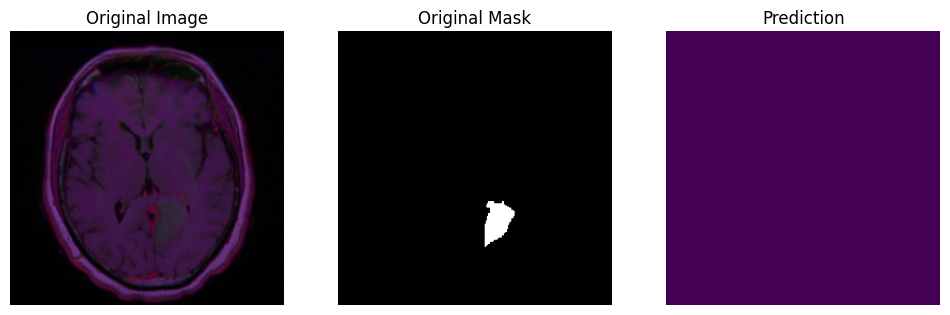

percentage of mask:  0.006927490234375


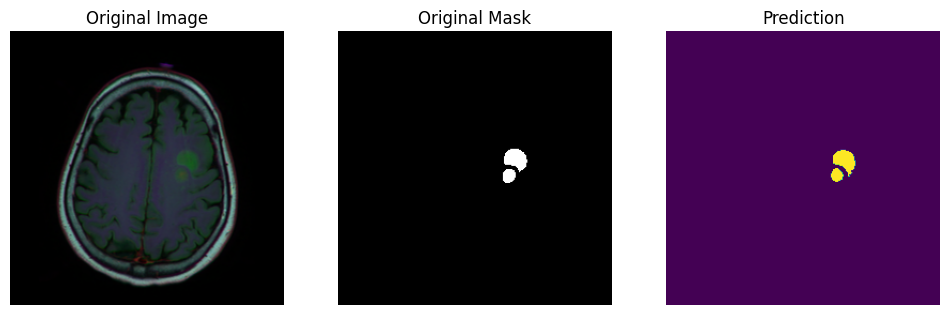

percentage of mask:  0.0023956298828125


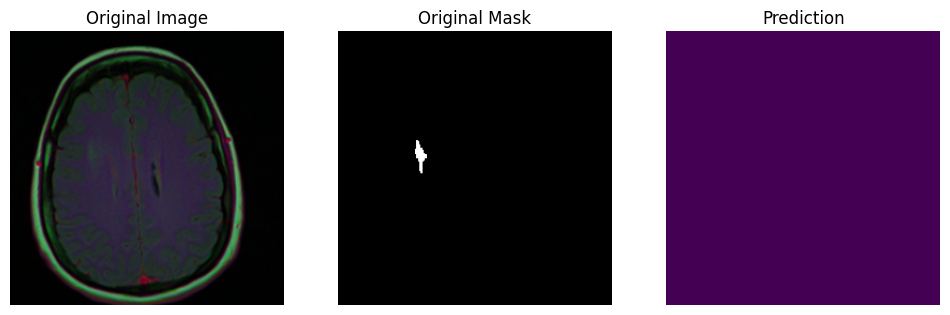

percentage of mask:  0.0
percentage of mask:  0.0
percentage of mask:  0.0269317626953125


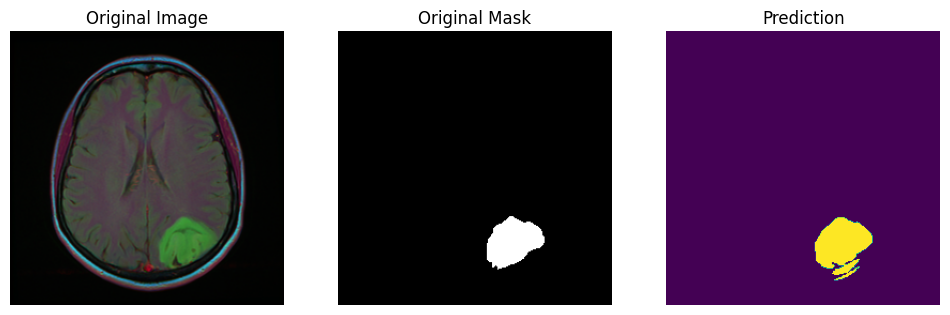

percentage of mask:  0.0362091064453125


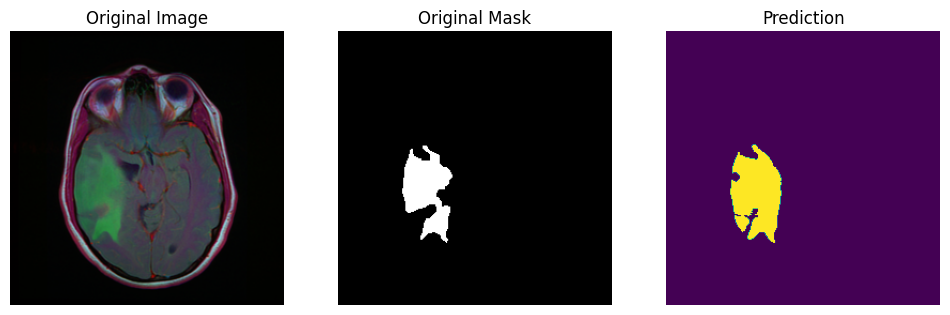

percentage of mask:  0.0217742919921875


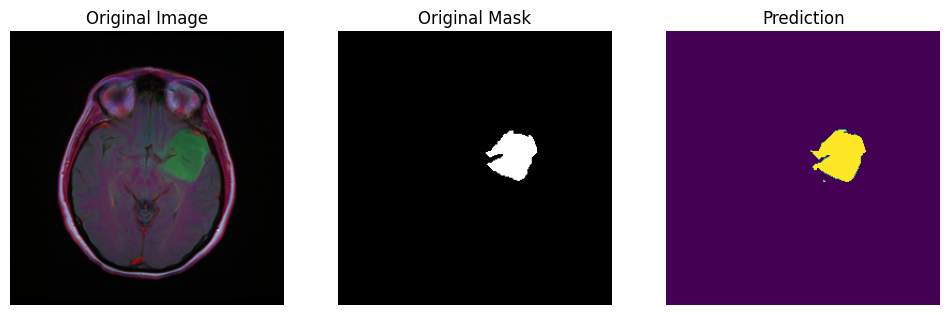

percentage of mask:  0.0098114013671875


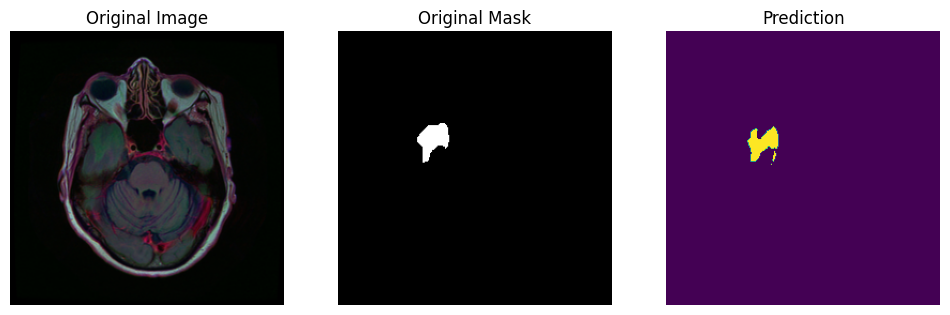

percentage of mask:  0.0
percentage of mask:  0.00140380859375


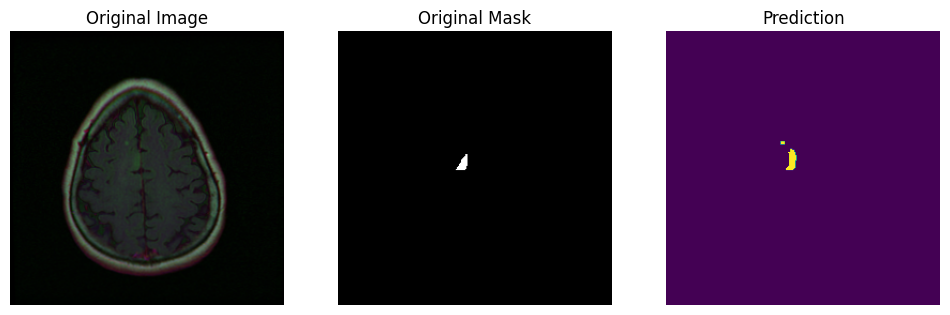

percentage of mask:  0.0
percentage of mask:  0.042144775390625


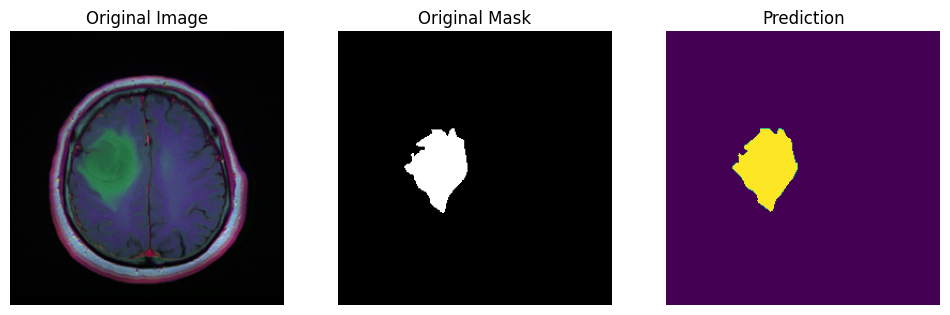

percentage of mask:  0.0175628662109375


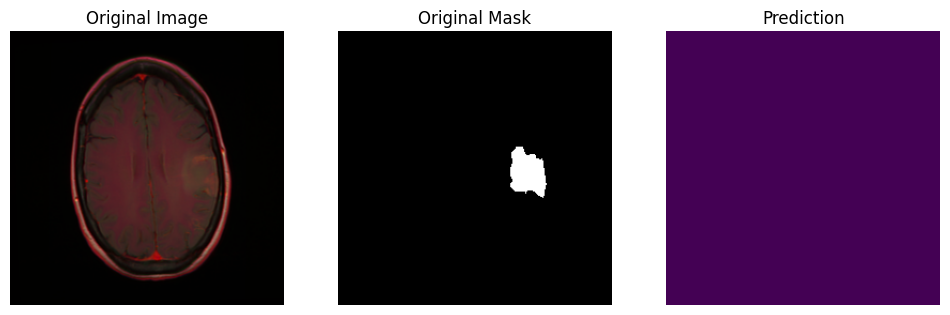

percentage of mask:  0.0075225830078125


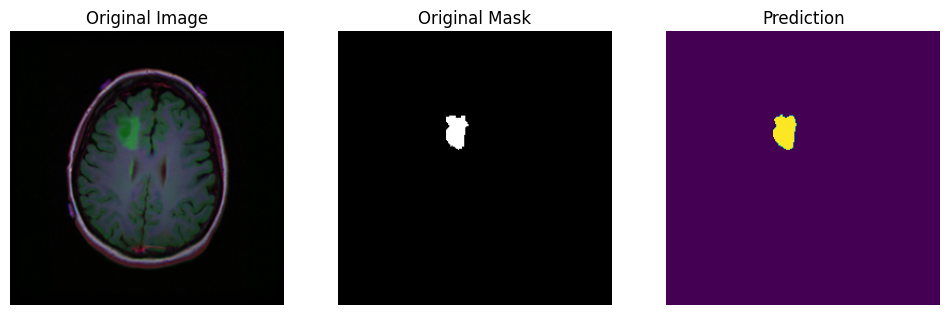

percentage of mask:  0.0152740478515625


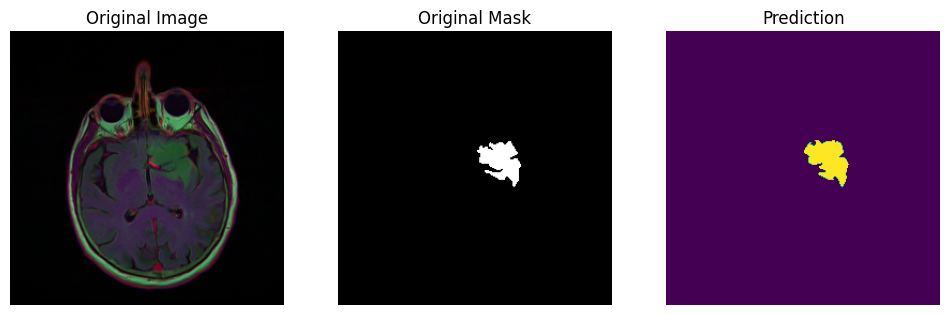

percentage of mask:  0.0
percentage of mask:  0.025726318359375


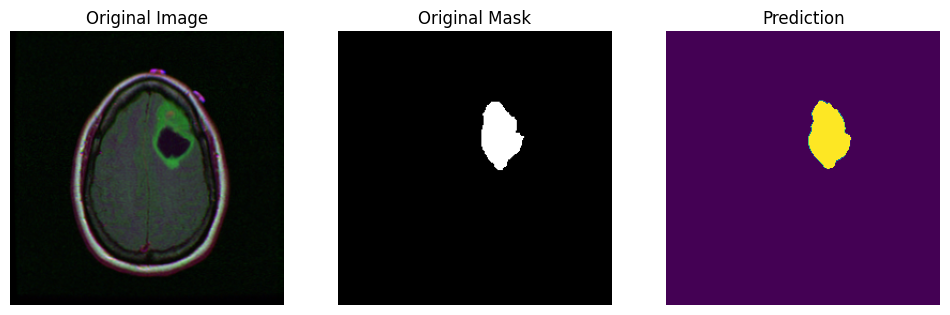

In [64]:
import random
random.seed(42)
rindex = random.sample(range(0,len(test_df.index)),20)
fweb_index = [] 

model.eval()
for index in rindex:
    img = cv2.imread(test_df['images_paths'].iloc[index])
    img = cv2.resize(img, (256, 256))
    img = img/255
    img = img[np.newaxis, :, :, : ]

    mask = np.squeeze(cv2.imread(test_df['masks_paths'].iloc[index],cv2.IMREAD_GRAYSCALE))/255
    # print("mask nonzero: ",np.nonzero(mask))
    percent_mask = mask.sum()/mask.size
    print ("percentage of mask: ", percent_mask)
    if (not percent_mask>0):
        continue
    fweb_index.append(index)

    with torch.no_grad():
        img = torch.tensor(img, dtype=torch.float32).to(device)
        img = img.permute(0, 3, 1, 2)
        predicted_img = model(img)

    plt.figure(figsize=(12, 12))
    
    plt.subplot(1, 3, 1)
    # Convert tensor to numpy and permute to (H, W, C)
    img_np = img.cpu().detach().numpy()
    img_np = np.squeeze(img_np)  # shape: (3, 256, 256)
    if img_np.ndim == 3 and img_np.shape[0] == 3:
        img_np = np.transpose(img_np, (1, 2, 0))  # (256, 256, 3)
    plt.imshow(img_np)
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(cv2.imread(test_df['masks_paths'].iloc[index])))
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    img_pre = (predicted_img>0.5).cpu().detach().numpy()
    img_pre = np.squeeze(img_pre)  # shape: (3, 256, 256)
    if img_pre.ndim == 3 and img_pre.shape[0] == 3:
        img_pre = np.transpose(img_pre, (1, 2, 0))  # (256, 256, 3)
    plt.imshow(img_pre)
    # plt.imshow(np.squeeze(predicted_img) > 0.5 )
    plt.title('Prediction')
    plt.axis('off')
    
    plt.show()

In [ ]:
mask.reshape(-1,3)

(65536, 3)

In [29]:
np.nonzero(mask)[0]

array([], dtype=int64)

In [43]:
mask_study = np.squeeze(cv2.imread(test_df['masks_paths'].iloc[rindex[2]],cv2.IMREAD_GRAYSCALE))

In [68]:
import shutil
for wi in fweb_index:
    print(test_df['masks_paths'].iloc[wi])
    shutil.copy(test_df['masks_paths'].iloc[wi], 'test_images')
    shutil.copy(test_df['images_paths'].iloc[wi], 'test_images')
    

/workspaces/data/kaggle_3m/TCGA_FG_6688_20020215/TCGA_FG_6688_20020215_19_mask.tif
/workspaces/data/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_41_mask.tif
/workspaces/data/kaggle_3m/TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_36_mask.tif
/workspaces/data/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_13_mask.tif
/workspaces/data/kaggle_3m/TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_10_mask.tif
/workspaces/data/kaggle_3m/TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_9_mask.tif
/workspaces/data/kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_12_mask.tif
/workspaces/data/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_42_mask.tif
/workspaces/data/kaggle_3m/TCGA_HT_7475_19970918/TCGA_HT_7475_19970918_22_mask.tif
/workspaces/data/kaggle_3m/TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_15_mask.tif
/workspaces/data/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_22_mask.tif
/workspaces/data/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_30_mask.tif
/work